### Tasca M9 T01

In [1]:
# importem les llibreries necessàries

import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import numpy as np
from collections import Counter

import matplotlib.pyplot as plt

Per aquest exercíci he agafat un dataset on hi ha text escrit a twitter. Una de les columnes ja mostra el sentiment del text, el qual l'utilitzarem només per fer la matriu de confusió.

En primer lloc llegirem el dataset i ens quedarem només en dues columnes, la de text i la del sentiment ja analitzat. D'aquesta última columna, ens quedarem només amb el sentiment Positiu, que serà identificat amb l'integral 1 i Negatiu amb el 0: 

In [2]:
df = pd.read_csv('twitter_validation.csv', sep=',', usecols=[2,3], names=['sentiment', 'text'])
df = df[(df['sentiment'] == 'Positive') | (df['sentiment'] == 'Negative')]
for el in df:
    df.loc[df['sentiment'] == 'Negative', 'sentiment'] = 0
    df.loc[df['sentiment'] == 'Positive', 'sentiment'] = 1
df['sentiment'] = df['sentiment'].astype('int')
df.head()

,sentiment,text
2,0,@Microsoft Why do I pay for WORD when it funct...
3,0,"CSGO matchmaking is so full of closet hacking,..."
5,0,Hi @EAHelp I’ve had Madeleine McCann in my cel...
6,1,Thank you @EAMaddenNFL!! \n\nNew TE Austin Hoo...
7,1,"Rocket League, Sea of Thieves or Rainbow Six: ..."


### Exercici 1
Agafa un text en anglès que vulguis, i calcula'n la freqüència de les paraules.

Tenim el text en un data frame, per tal de contar la frequència de les paraules transformarem tota la columna del *text* del dataframe i la transformarem en llista i string per tal de comptar les paraules més repetides.

In [3]:
ls = list(df['text'])
str1 = ''.join(ls)
counts = Counter(str1.split()).most_common()

In [4]:
# Aqui la mostra de totes les files del df juntes com a string
str1

'@Microsoft Why do I pay for WORD when it functions so poorly on my @SamsungUS Chromebook? 🙄CSGO matchmaking is so full of closet hacking, it\'s a truly awful game.Hi @EAHelp I’ve had Madeleine McCann in my cellar for the past 13 years and the little sneaky thing just escaped whilst I was loading up some fifa points, she took my card and I’m having to use my paypal account but it isn’t working, can you help me resolve it please?Thank you @EAMaddenNFL!! \n\nNew TE Austin Hooper in the ORANGE & BROWN!! \n\n#Browns | @AustinHooper18 \n\n pic.twitter.com/GRg4xzFKOnRocket League, Sea of Thieves or Rainbow Six: Siege🤔? I love playing all three on stream but which is the best? #stream #twitch #RocketLeague #SeaOfThieves #RainbowSixSiege #followmy ass still knee-deep in Assassins Creed Odyssey with no way out anytime soon lmaoFIX IT JESUS ! Please FIX IT ! What In the world is going on here.  @PlayStation @AskPlayStation @Playstationsup @Treyarch @CallofDuty negative 345 silver wolf error code

In [5]:
# I les 20 paraules més repetides
counts[0:20]

[('the', 290),
 ('to', 223),
 ('and', 213),
 ('a', 184),
 ('I', 172),
 ('is', 157),
 ('of', 144),
 ('for', 112),
 ('in', 101),
 ('on', 87),
 ('this', 87),
 ('you', 84),
 ('my', 81),
 ('with', 75),
 ('it', 72),
 ('that', 69),
 ('game', 58),
 ('so', 56),
 ('are', 51),
 ('have', 49)]

Les paraules més repetides són bàsicament preposicions, articles, etc, que no aporten massa a l'anàlisis de text. Per tant aplicarem una llista pre definida en anglès per tal d'eliminar aquestes paraules. Tokenitzarem l'string i filtrarem les paraules i tornem a comptar:

In [6]:
tokens = word_tokenize(str1.lower())
filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]
counts = pd.Series(Counter(filtered_tokens)).sort_values(ascending=False)
counts[0:20]

#            268
.            263
@            259
!            200
,            196
’            133
?            114
game          75
:             70
like          49
's            46
get           39
...           35
n't           35
love          34
play          31
new           29
microsoft     28
2             26
really        26
dtype: int64

Hem aconseguit eliminar els articles, preposicions, etc. però ens hem quedat amb molts simbols, degut a l'orígen del text (twitter) que tampoc ens interessa. El que farem és incluir a la llista de *stopwords* pre-definida els símbols que ens aparèixen i tornarem a copmptar:

In [7]:
swe = stopwords.words('english')
new_stopwords_to_add = ['.', '#', '@', '!', '?', ';', ':', '\'s','n\'t', ',','&','’', '2', '...', '3','(',')',
                        '\'m', '``', '-', '🤔']
swe.extend(new_stopwords_to_add)

#Tornem a filtrar
filtered_tokens = [token for token in tokens if token not in swe]
counts = pd.Series(Counter(filtered_tokens)).sort_values(ascending=False)
counts[0:50]

game           75
like           49
get            39
love           34
play           31
new            29
microsoft      28
really         26
johnson        25
https          24
games          24
time           24
best           24
one            24
got            24
fucking        22
good           21
playing        21
fifa           20
want           20
would          20
guys           19
go             19
na             19
pubg           19
verizon        19
redemption     18
much           18
dead           18
creed          18
people         18
even           17
getting        17
shit           17
red            17
still          17
fortnite       16
borderlands    16
fix            16
back           16
nba2k          16
make           15
eamaddennfl    15
gon            15
xbox           15
going          15
looks          14
league         14
think          14
hearthstone    14
dtype: int64

Ara sí! Observem la frequència de paraules dels tweets al nostre dataset. Per fer-ho més visual, apliquem aquesta frequència en un núvol de paraules. Quant més gran la paraula, més apareix al text:

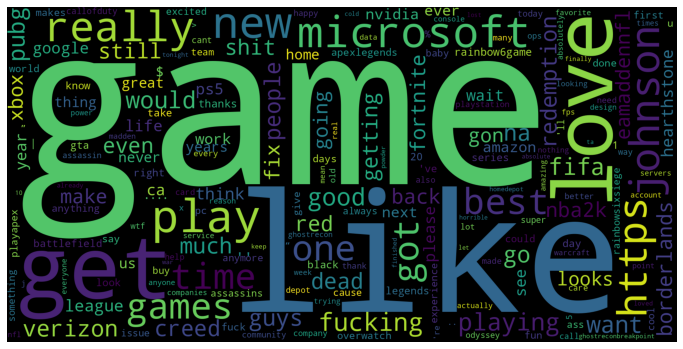

<Figure size 432x288 with 0 Axes>

In [54]:
from wordcloud import WordCloud, ImageColorGenerator

fig = plt.figure(figsize=(12,9))

data = counts

wc = WordCloud(width=1800, height=900).generate_from_frequencies(data)
plt.imshow(wc)
plt.axis('off')
plt.show()

plt.savefig('Word_Cloud_tweets.png')

### Exercici 2

Treu les stopwords i realitza stemming al teu conjunt de dades.

Creem una funció per filtrar les paraules amb la nova llista de stopwords ja generada amb els símbols i apliquem el *lemmatizer* al nostre df

In [9]:
# create preprocess_text function
def preprocess_text(text):

    # Tokenize el text

    tokens = word_tokenize(text.lower())


    # Treiem les stopwords incluint els símbols

    filtered_tokens = [token for token in tokens if token not in swe]


    # Lemmatizem els tokens

    lemmatizer = WordNetLemmatizer()

    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]


    # Els posem tots en un string

    processed_text = ' '.join(lemmatized_tokens)

    return processed_text

In [10]:
#Apliquem la funció i mostrem els primers 5 resultats
df['text'] = df['text'].apply(preprocess_text)
df.head()

,sentiment,text
2,0,microsoft pay word function poorly samsungus c...
3,0,csgo matchmaking full closet hacking truly awf...
5,0,hi eahelp madeleine mccann cellar past 13 year...
6,1,thank eamaddennfl new te austin hooper orange ...
7,1,rocket league sea thief rainbow six siege🤔 lov...


### Exercici 3

Realitza sentiment analysis al teu conjunt de dades.

Utilitzarem el *SentimentIntensityAnalizer*, específicament la funció polarity scores per tal de generar una nova columna *sentiments_predicted*

In [46]:
# initialize NLTK sentiment analyzer

analyzer = SentimentIntensityAnalyzer()


# create get_sentiment function
sc = []

def get_sentiment(text):

    scores = analyzer.polarity_scores(text)

    sentiment = 1 if scores['compound'] > 0 else 0
    
    sc.append(scores)

    return sentiment




# apply get_sentiment function

df['sentiment_predicted'] = df['text'].apply(get_sentiment)

df

,sentiment,text,sentiment_predicted
2,0,microsoft pay word function poorly samsungus c...,0
3,0,csgo matchmaking full closet hacking truly awf...,0
5,0,hi eahelp madeleine mccann cellar past 13 year...,1
6,1,thank eamaddennfl new te austin hooper orange ...,1
7,1,rocket league sea thief rainbow six siege🤔 lov...,1
...,...,...,...
992,1,guess 'll broke,0
993,0,please explain possible let company overcharge...,0
994,1,good sony much want see new ps5 going right mu...,1
997,1,today sucked time drink wine n play borderland...,0


Per tal d'escollir si el *sentiment_predicted* és positiu o negatiu, he escollit fer-ho a partir del compound de l'score. L'score ens dóna un numero entre 0 i 1 pel 'neg', 'neutral' i 'positiu'. A partir d'aquests tres números calcula el compound, valor entre -1 i 1. El límit aplicat és el 0. Si és superior a 0 classifiquem la frase com a positiva i si és menor com a negativa. Mostrem els primers 5 scores i 5 frases per poder tenir una idea de com funciona, en aquest cas, les dues primeres són classificades com a negatives i les dues últimes com a positives:

In [47]:
sc[0:5]

[{'neg': 0.189, 'neu': 0.811, 'pos': 0.0, 'compound': -0.1027},
 {'neg': 0.252, 'neu': 0.504, 'pos': 0.244, 'compound': -0.0258},
 {'neg': 0.053, 'neu': 0.695, 'pos': 0.252, 'compound': 0.7178},
 {'neg': 0.0, 'neu': 0.8, 'pos': 0.2, 'compound': 0.3612},
 {'neg': 0.123, 'neu': 0.507, 'pos': 0.37, 'compound': 0.7783}]

In [48]:
for i in range (5):
    print(i, df['text'].iloc[i])

0 microsoft pay word function poorly samsungus chromebook 🙄
1 csgo matchmaking full closet hacking truly awful game
2 hi eahelp madeleine mccann cellar past 13 year little sneaky thing escaped whilst loading fifa point took card use paypal account working help resolve please
3 thank eamaddennfl new te austin hooper orange brown brown | austinhooper18 pic.twitter.com/grg4xzfkon
4 rocket league sea thief rainbow six siege🤔 love playing three stream best stream twitch rocketleague seaofthieves rainbowsixsiege follow


Seguidament generem la matriu de cinfusió on, en la diagonal principal observem els sentiments que eren negatius i s'han predit com a negatius (0,0) i els que eren positius i s'han predit com a positius (1,1). Els falsos negatius són 71 (0,1) i els falsos positius 76 (1,0):

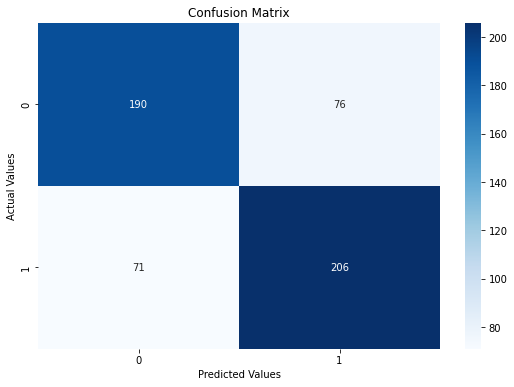

In [52]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(df['sentiment'], df['sentiment_predicted'])

import seaborn as sns
plt.figure(figsize=(9,6))
sns.heatmap(pd.DataFrame(cm), fmt='', annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')


plt.savefig('Confusion_matrix_text_analysis.png')

Podem veure el resum dels resultats en el *classification report*. Recordem que:

$Precision = \frac{TP}{TP+FP}$, que respon a:
Quina proporció d'identificacions positives era realment correcta?

$Recall = \frac{TP}{TP+FN}$, que respon a:Quina proporció de positius reals s'ha identificat correctament?

Amb aquest model hem obtingut una Accuràcia del 74%. Cal dir que modifican el limit imposat podriem millorar aquest resultat i que, no tenim fonts del model o de com s'ha obtingut si una classificació era positiva o no en el dataset. 

In [53]:
from sklearn.metrics import classification_report

print(classification_report(df['sentiment'], df['sentiment_predicted']))

              precision    recall  f1-score   support

           0       0.73      0.71      0.72       266
           1       0.73      0.74      0.74       277

    accuracy                           0.73       543
   macro avg       0.73      0.73      0.73       543
weighted avg       0.73      0.73      0.73       543

